In [69]:
import pymannkendall as mk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.path as mplPath
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [70]:
corr = xr.open_dataset('C:/JRA55_temp/Frank_SST_ENSO/Ppt_Cor1_SON_DMI.nc')
#corr

In [72]:
cor1 = corr.sel(lon=slice(28.8, 31), lat=slice(-2.9, -1))  ## Slice to Africa
cor1

<xarray.Dataset>
Dimensions:  (lon: 44, lat: 38)
Coordinates:
  * lon      (lon) float64 28.85 28.9 28.95 29.0 29.05 ... 30.85 30.9 30.95 31.0
  * lat      (lat) float64 -2.875 -2.825 -2.775 -2.725 ... -1.125 -1.075 -1.025
Data variables:
    cor      (lat, lon) float32 ...
    cor_sig  (lat, lon) float32 ...

In [17]:
#Shapefile to plot
#sf = gpd.read_file('D://Folder_2023//GIS_DATA//Rwanda//RWA_adm0.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Rwanda//RWA_adm1.shp')       ## Used in plotting

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_12940\1154562364.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.5, wspace=0.05,top=0.95, bottom=0.2, left=0.40, right=0.975)


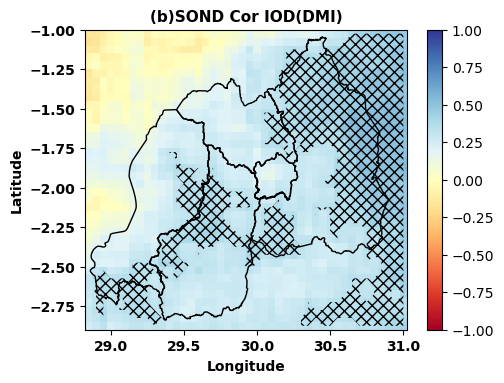

In [19]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 4))
#fig=plt.figure(figsize=(12,7))
fig.subplots_adjust(hspace=0.5, wspace=0.05,top=0.95, bottom=0.2, left=0.40, right=0.975)
## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
#setting the layout on which the stippling will be used.
X = cor1.cor.lon.values
Y = cor1.cor.lat.values
lon,lat = np.meshgrid(X,Y)
#ax=fig.add_subplot(nrows,ncols,index+1, projection=ccrs.PlateCarree())
cor1.cor.plot(cmap='RdYlBu',vmin=-1.0, vmax=1.0,cbar_kwargs={'orientation':'vertical','label':''})
plt.contourf(lon,lat,cor1.cor_sig,hatches=['xxx'],alpha=0)
## title attributes
plt.title('(b)SOND Cor IOD(DMI)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
plt.savefig('C:/JRA55_temp/Frank_SST_ENSO/RD_DMI.png')
plt.show()

   ### For Dinis_Correlation 

In [14]:
import pymannkendall as mk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.path as mplPath
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [15]:
corr = xr.open_dataset('C:/Dinis_MOZ/corr/corr_tc_VWS_2000_2020.nc')
#corr

In [16]:
cor1 = corr.sel(lon=slice(30, 110), lat=slice(-5, -40))  ## Slice to Africa
#cor1
#corr.cor_sig.plot()

In [17]:
#Shapefile to plot
#sf = gpd.read_file('D://Folder_2023//GIS_DATA//Rwanda//RWA_adm0.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//Research//Africa_Research//shapefile//World_Countries.shp')       ## Used in plotting

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_18196\4053131979.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.5, wspace=0.05,top=0.95, bottom=0.2, left=0.40, right=0.975)


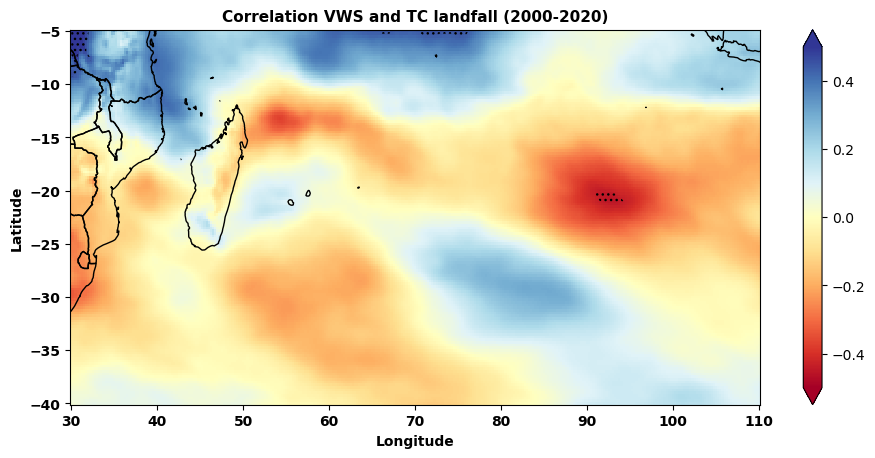

In [19]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(15, 5))
#fig=plt.figure(figsize=(12,7))
fig.subplots_adjust(hspace=0.5, wspace=0.05,top=0.95, bottom=0.2, left=0.40, right=0.975)
## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
#setting the layout on which the stippling will be used.
X = cor1.cor.lon.values
Y = cor1.cor.lat.values
lon,lat = np.meshgrid(X,Y)
#ax=fig.add_subplot(nrows,ncols,index+1, projection=ccrs.PlateCarree())
cor1.cor.plot(cmap='RdYlBu',vmin=-0.5, vmax=0.5, extend = 'both', cbar_kwargs={'orientation':'vertical','label':''})
plt.contourf(lon,lat,cor1.cor_sig,hatches=['...'],alpha=0)
## title attributes
plt.title('Correlation VWS and TC landfall (2000-2020)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
plt.savefig('C:/Dinis_MOZ/corr/VWS_TC_COR_2000_2020.png')
plt.show()